# Data Analysis of the House Prices datasets

In this notebook, we are going to to analyse the different variables of the House Prices Daset from the Kaggle Competition: [House Prices: Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

In [1]:
# === System imports ===
import csv
sys.path.append("../")

# === Third-party import ===

# To handle datasets
import pandas as pd
import numpy as np
# To visualize data
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib
import seaborn as sns
# To display missing values
import missingno as msno


# `Set the font size
matplotlib.rcParams.update({'font.size': 12})

# To display only a limited number of columns of the dataframe in the whole notebook
pd.options.display.max_rows = 20

# === Local imports ===
import utils

## Load data

In [14]:
train = pd.read_csv(filepath_or_buffer='../datasets/inputs/train.csv')
test = pd.read_csv(filepath_or_buffer='../datasets/inputs/test.csv')
sample_submission = pd.read_csv(filepath_or_buffer='../datasets/inputs/sample_submission.csv')

In [15]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
for col in train.columns:
    if col not in test.columns:
        print(f'The column {col} is in the train but not in the test set')

The column SalePrice is in the train but not in the test set


In [18]:
sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [19]:
print(f'Training data shape: ', train.shape)
print(f'Testing data shape: ', test.shape)
print(f'Sample submission data shape: ', sample_submission.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)
Sample submission data shape:  (1459, 2)


### Description of the data

We have:

1. A training set with 81 columns: **`Id` + 79 variales + target (`Sale Price`)**
2. A testing set with 80:**`Id` + 79 variables**
3. A sample submission with:
    - `Id`
    - The predicted value for this `Id`

***Note:***

The training and testing set have a relativeley equal number of rows but are different data (there ids differ)

In the following analysis we are going to work on the training set exclusively.

For this, we are going to rename `train` to `data`

In [20]:
data = train

## Quick overview of the variables

In [21]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Observations

- Some variables contain **missing values**
- Variables are of three types: float64, int64, object

Intuitively, `float64` and `object` are respectively **numerical** and **categorical**.

What about `int64`?

For instance, if we consider the `int64` variable: `LotArea`...

In [23]:
data['LotArea'].head(10)

0     8450
1     9600
2    11250
3     9550
4    14260
5    14115
6    10084
7    10382
8     6120
9     7420
Name: LotArea, dtype: int64

... it takes discreate Integer values. We can consider it a **numerical variables**

On the other hand, if we take the variable `OverallQual`, we just get to read the [description](../datasets/inputs/data_description): 
<hr>

```
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

```

<hr>

... to figure out that it is **categorical**






### Conclusion:

We need to consider the variables one by one to categorize them. We will do that later.

## Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

<Figure size 1080x720 with 0 Axes>

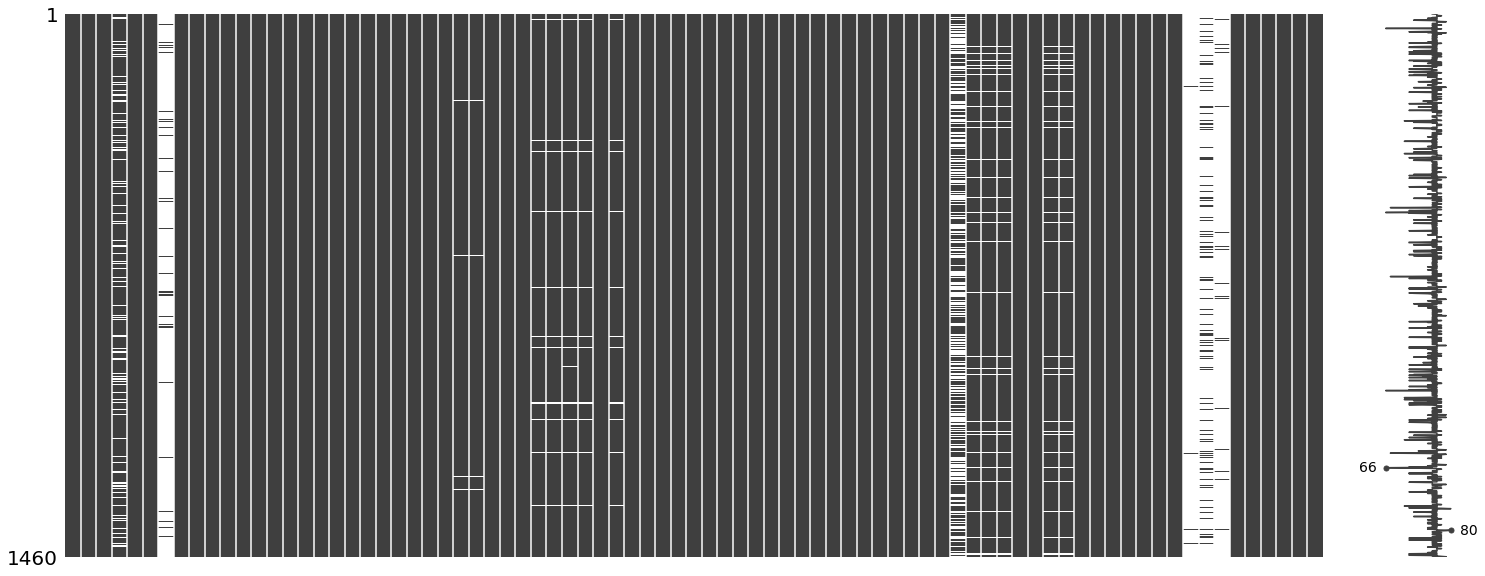

In [24]:
plt.figure(figsize=(15,10))
msno.matrix(data)

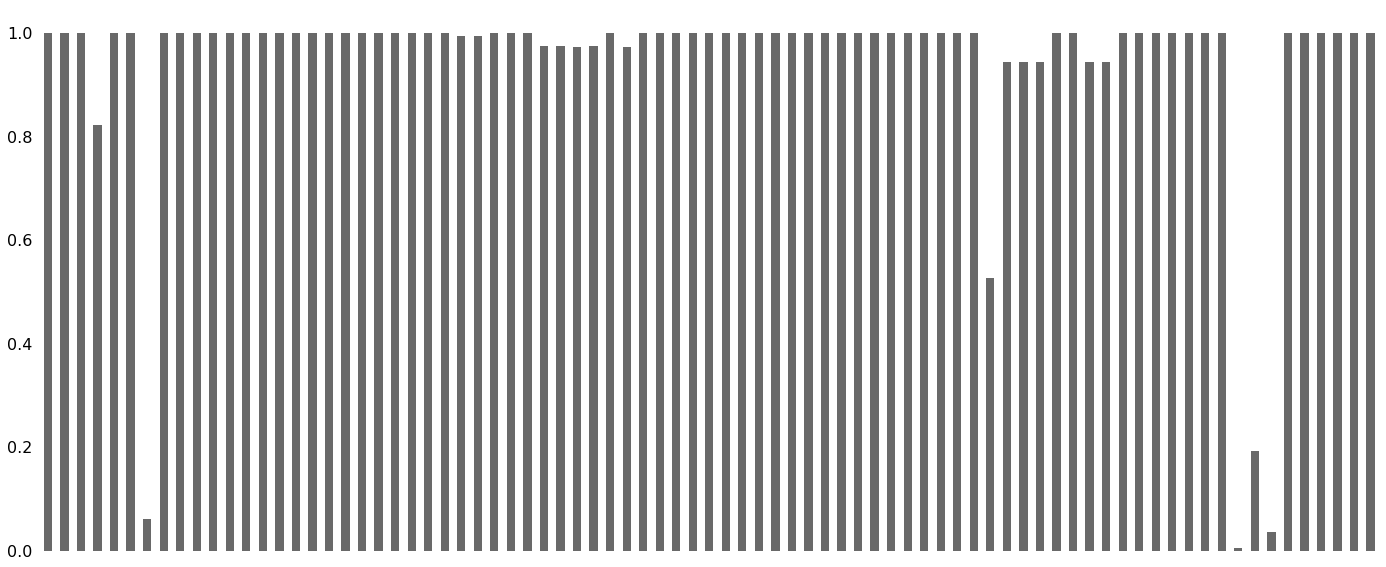

In [25]:
plt.figure(figsize=(15,10))
msno.bar(data)

### Observations

- Most columns seem to be complete
- 4 seem to be almost full of missing values
- 1/2 seems roughly halfly made of missing values
- The other columns with missing values seem to share these missing values for certain rows only

Let's try to find out the influence of missing value on the taget variable.

For this, we will compare:
- the median
- the average <br>
of `SalePrices`, when:
- The data is missing
- The data is not missing


#### Relationship between values being missing and Sale Price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

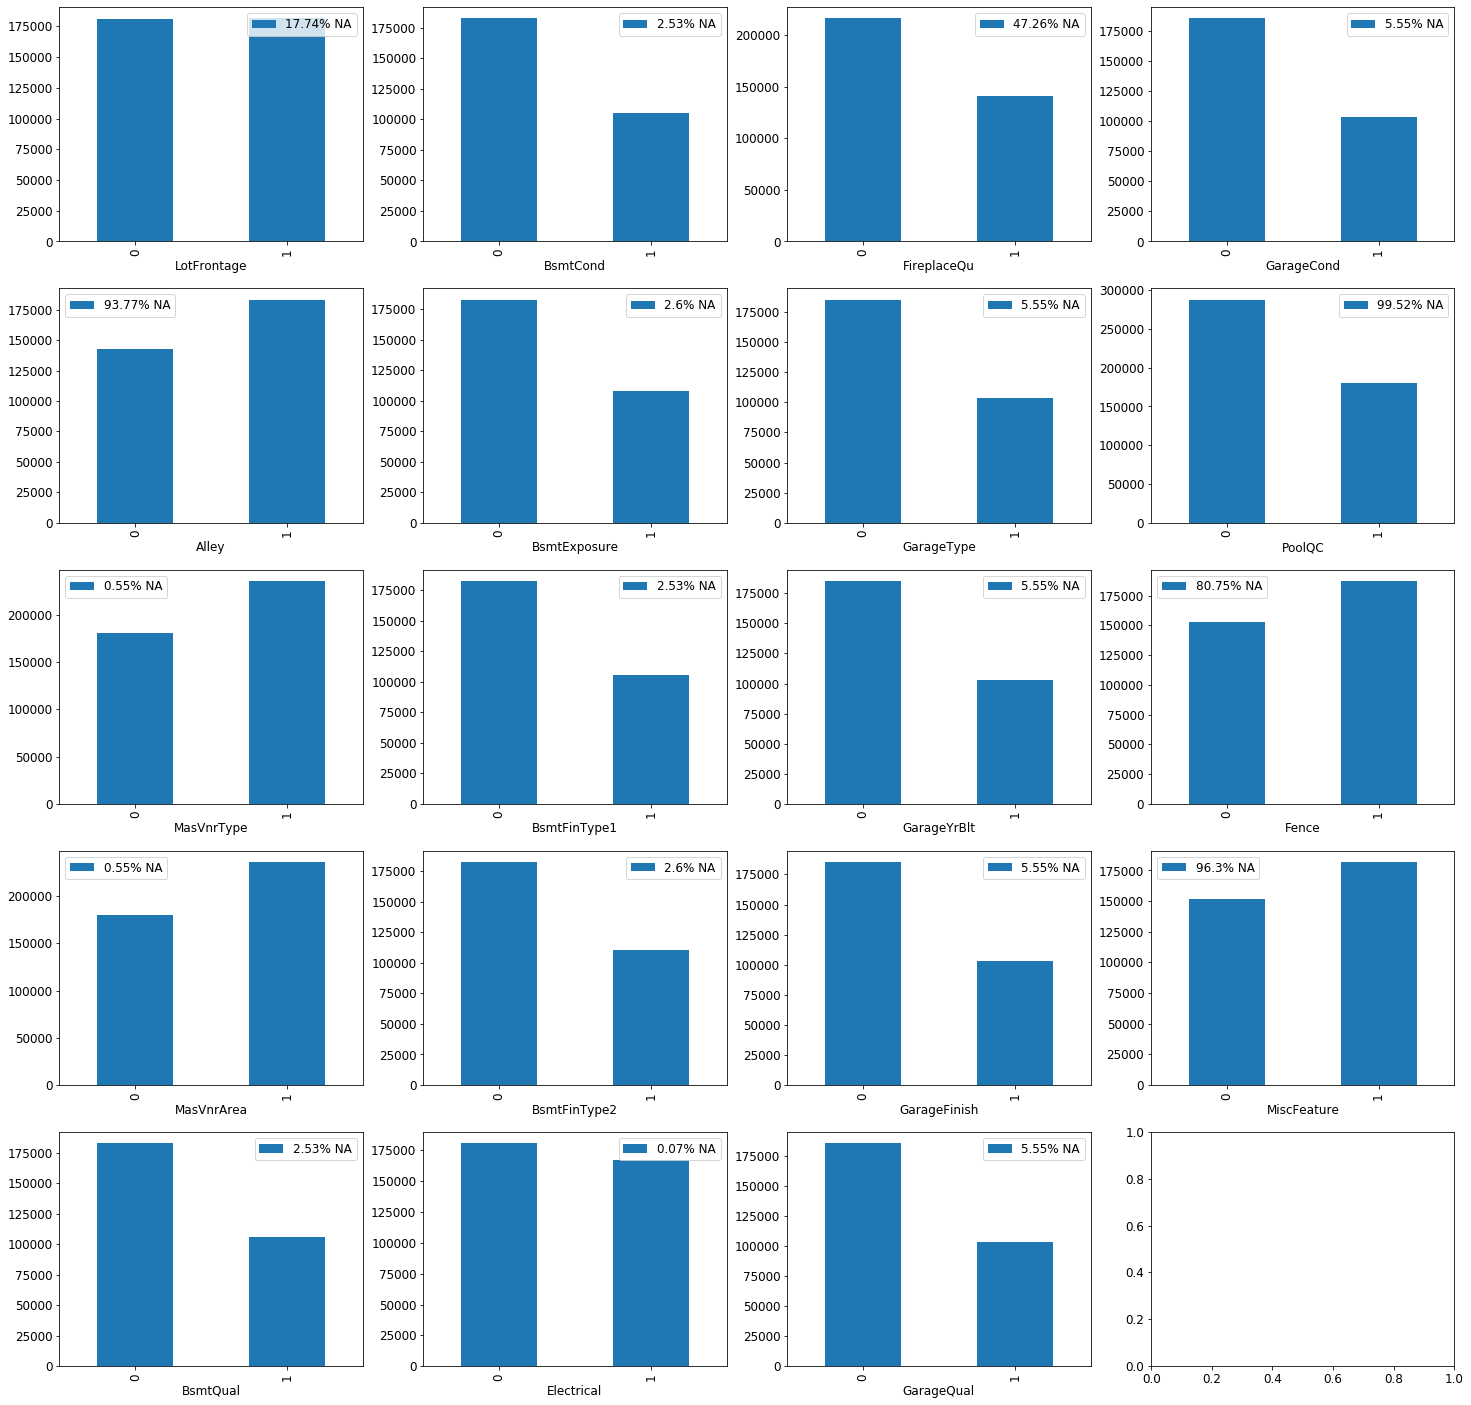

In [26]:
def analyse_na_value(df, var, i, j):

    df = df.copy()

    # Keep the percentage of missing values for the variable
    percent_na = round((df[var].isnull().sum()/len(df))*100, 2)

    # Make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Compare the average SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)['SalePrice'].mean().plot(kind='bar',
                                            ax=axes[i, j],
                                            label=f'{percent_na}% NA')
    axes[i, j].legend(loc='best')



vars_with_na = [var for var in data.columns if data[var].isnull().sum() >0]

fig, axes = plt.subplots(nrows=5, 
                        ncols=4, 
                        figsize=(25, 25))
i = j = 0

for var in vars_with_na:  
    analyse_na_value(data, var, i, j)
    if i < 4:
        i +=1
    else: # i == 4
        i = 0
        j +=1
plt.show()

The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. 

In another notebook, we are going to deal with missing values for use in Machine Learning

# Analysis of the target

Let's analyse the target variable: `SalePrice` separately first 

In [27]:
target = 'SalePrice'
data[target].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [28]:
data[target].isna().any()

False

## Observations

- The target variable `SalePrice` has no missing values
- Its values are between 34.900$ and 755000$
- The average sale price is aorund 180K$



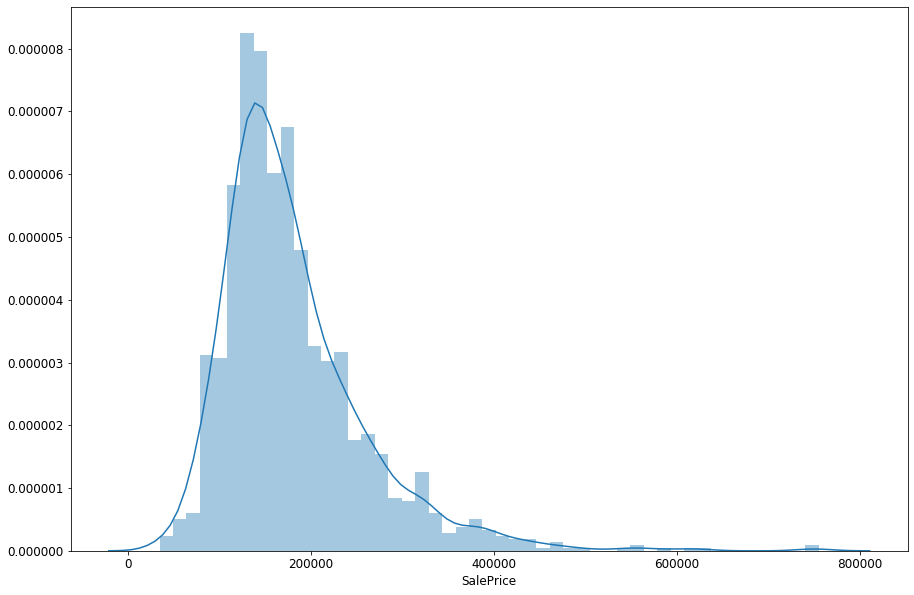

In [29]:
plt.figure(figsize=(15,10))
sns.distplot(data[target])

### Definitions

[Reference](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

In statistics:

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

For a **Standard normal distribution**: <br>
skweness = **0**


**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

For a **Standard normal distribution**: <br>
kurtosis= **3**

In [30]:
print(f"Skewness: {data[target].skew()}")
print(f"Kurtosis: {data[target].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


## Observations

- The distribution doesn't really follow a **normal distribution**

- It has a **skewness on the left side which could be interpreted as: rarer high-priced than low-priced houses

- It also has Kurtosis

The metric of evaluation for this competition being the Logarithmic Root-Mean-Squared-Error, let's log the `SalePrice`

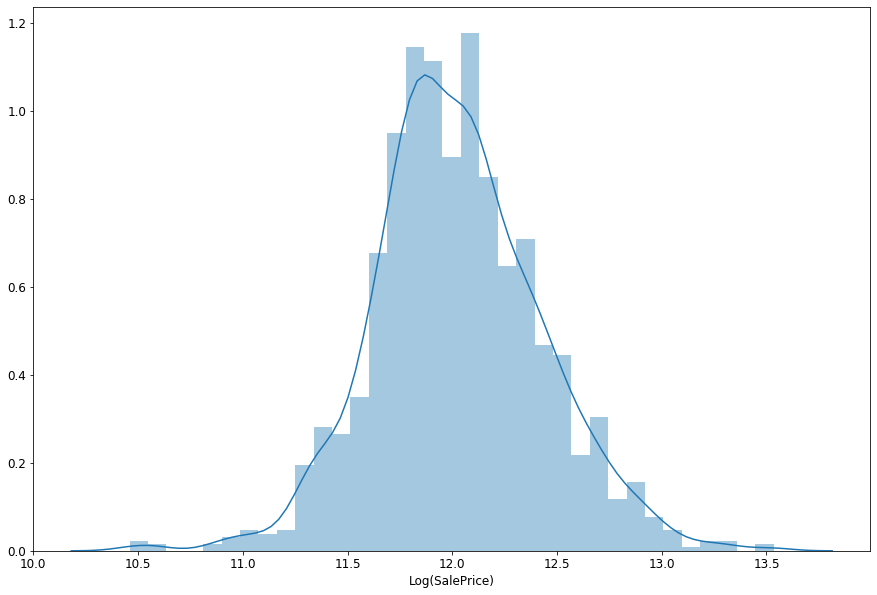

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(np.log(data[target]), 
                axlabel='Log(SalePrice)')

In [32]:
print(f"Skewness: {np.log(data[target]).skew()}")
print(f"Kurtosis: {np.log(data[target]).kurt()}")

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


## Observations

- Logging the `SalePrice` reduce drastically the skewness, the distribution looks more symetrical
- The Kurtosis still remains far from 3

## Relathioships between variables

Let's get an overview of our relashionships between variables by displaying the heatmap.

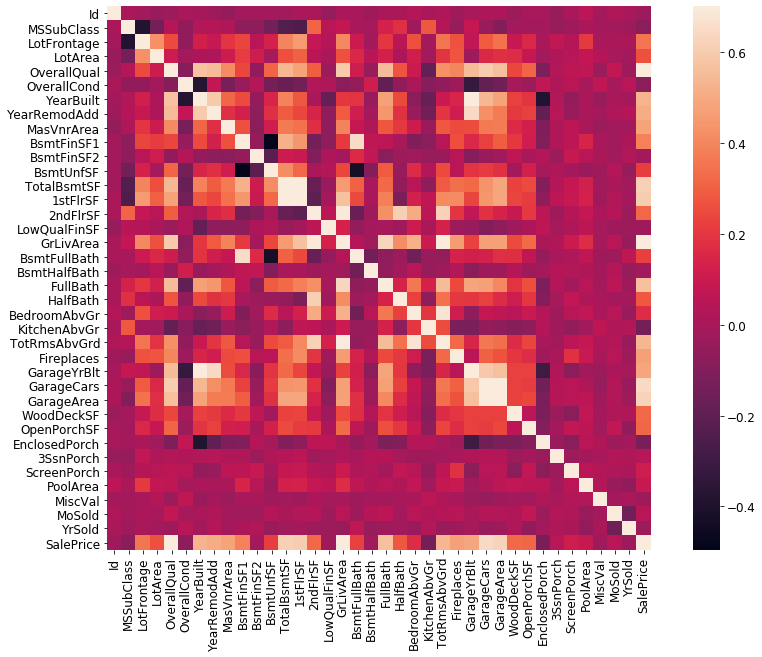

In [33]:
#correlation matrix
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax= 0.7, square=True)

## Observations

1. First we can delve into the correlations on the different variables on `SalePrice`. Some of the variables have a stong correlations with `SalePrice`. It can be interesting to save these for later.

2. Pairs or groups of three variables seem to have strong correlations together:
    - `TotalBsmtSF` and `1stFirSF` variables
    - "Garage" variables: `GarageYrBlt`, `GarageCars`, `GarageArea`, which makes sense
    

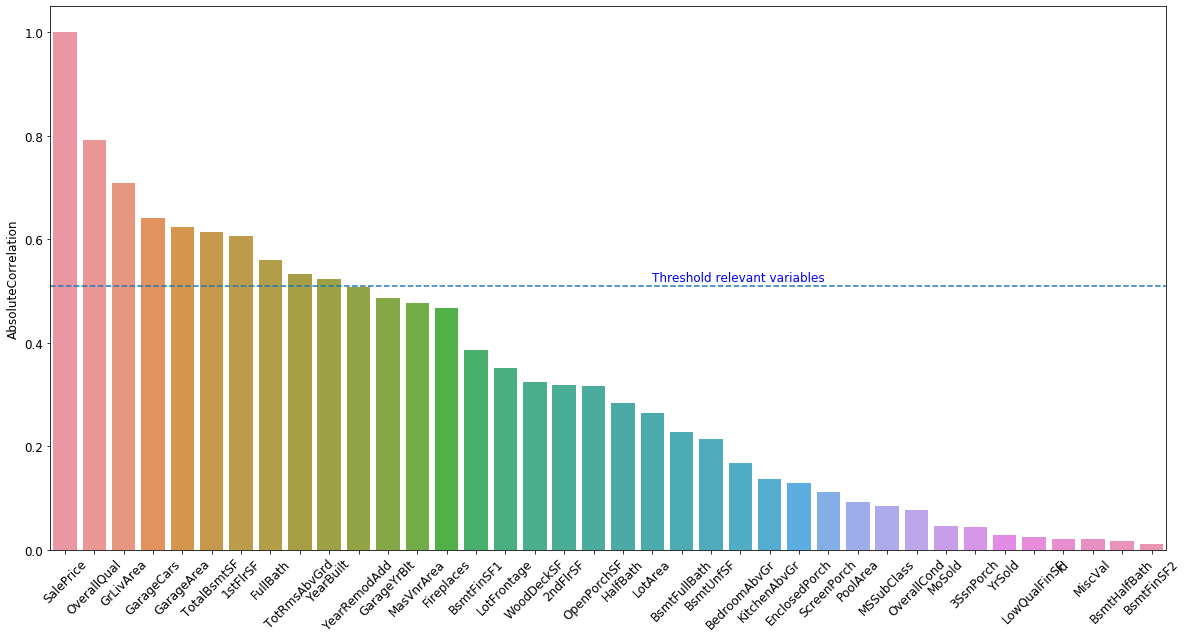

In [34]:
influence_on_target = corrmat[[target]]
influence_on_target.columns = ['Correlation']
influence_on_target['AbsoluteCorrelation'] = abs(influence_on_target['Correlation'])
influence_on_target.sort_values(by='AbsoluteCorrelation', ascending=False, inplace=True)

# Set the threshold on the correlation above which we consider the variable to be relevant to describe SalePrice
# We set it right above 50%
threshold_relevant_variables = 0.51


fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=influence_on_target, x=influence_on_target.index, y='AbsoluteCorrelation')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(threshold_relevant_variables, ls='--')
_ = ax.text(20, threshold_relevant_variables+0.01, "Threshold relevant variables", color='blue')

There are 9 variables that can be considered relevant to describe `SalePrice` (we exclude `SalePrice` itself)

In [35]:
most_relevant_variables = list(influence_on_target.index[:10])

Let's focus on these most impactful variables

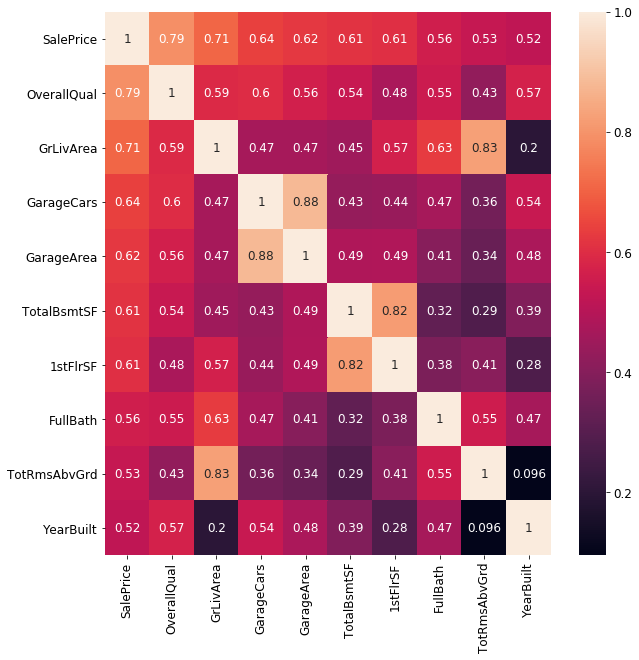

In [36]:
main_corrmat = data[most_relevant_variables].corr()


plt.figure(figsize=(10,10))
sns.heatmap(data=main_corrmat,
            annot=True)

## Observations

- For pair variables that are really correlated:
    - `GarageArea` and `GarageCars`
    - `TotalBsmtSF` and `1stFlrSF`

    We could just keep the variables with the strongest correlation to `SalePrice`, i.e., remove `GarageCars` and `1stFlrSF` from `most_relevant_variables`

- About `YearBuilt`, I think it doesn't make much sense by itself. It would be more relevant to inclue `YearSold` as well, we will do that later. For now I will remove it from the `most_relevant_variables`

    *Ex:* if we consider an old house sold one year after it was built. When sold, it was not considered old.

In [37]:
most_relevant_variables.remove('GarageCars')
most_relevant_variables.remove('1stFlrSF')
most_relevant_variables.remove('YearBuilt')



utils.save_list(list_name=most_relevant_variables, 
          file_path='../datasets/outputs/most_relevant_variables.csv')


## Keeping main variables

In the following, we will only focus on these main variables: `most_relevant_variables`

In [38]:
data = data[most_relevant_variables]
data.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd
0,208500,7,1710,548,856,2,8
1,181500,6,1262,460,1262,2,6
2,223500,7,1786,608,920,2,6
3,140000,7,1717,642,756,1,7
4,250000,8,2198,836,1145,2,9


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


We have fewer variables to deal with. Reading the doucumentation, we can easily classify them:
- **Numerical variables:** `GrLivArea`, `GarageArea`, `TotalBsmtSF`
- **Categorical variables:** `OverAllQual`, `FullBath`, `TotalRmsAbvGrd`, `YearBuilt`

In [41]:
utils.save_list(list_name=most_relevant_variables, 
          file_path='../datasets/outputs/most_relevant_variables.csv')

## Numerical Variables distribution

In [42]:
numerical_variables = ['GrLivArea', 'GarageArea', 'TotalBsmtSF']

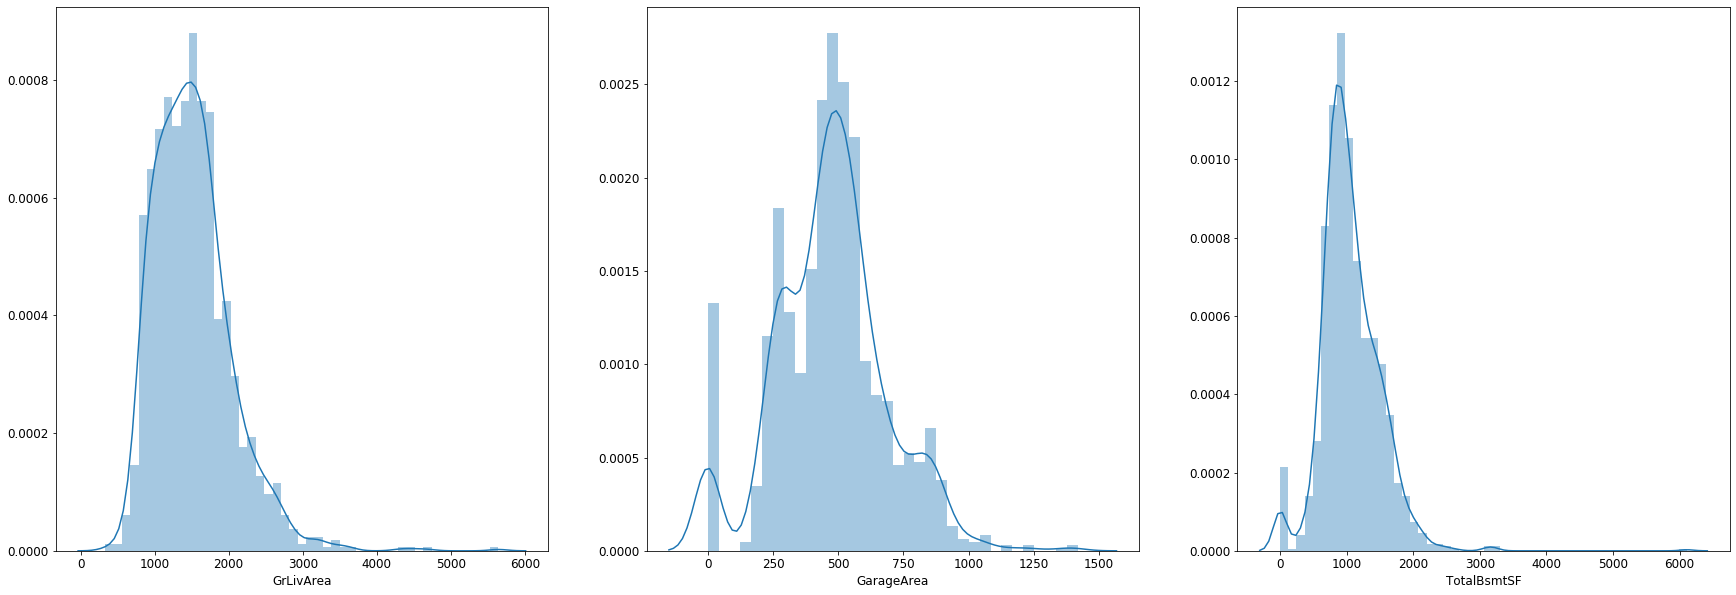

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

for var, ax in zip(numerical_variables, axes.flat):
    sns.distplot(data[var], ax=ax)


Similarily to `SalePrice`, these variables seem to have some skewness.

In [44]:
for var in numerical_variables:
    if any(data[var]==0):
        print(f"{var} contains null values")

GarageArea contains null values
TotalBsmtSF contains null values


Unfortunately the variables: `GarageArea` and `TotalBsmtSF` have null variables in the case where the house has no garage or basement. This makes the logarithmic transformation impossible.

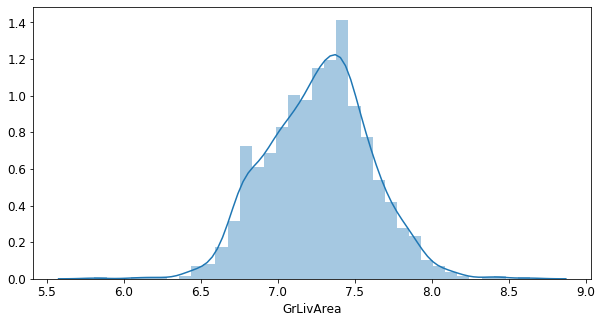

In [267]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(data['GrLivArea']))

However, log-transforming `GrLivArea` can be useful.